<a href="https://colab.research.google.com/github/Cnaraa/Crypto-News-Sentiment-Analysis/blob/main/Cryptocurrency_News_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import numpy as np
import tensorflow as tf

In [2]:
nltk.download('punkt', download_dir='.') #дополнительный словарь со знаками пунктуации
nltk.download('stopwords') #дополнительный словарь со стопсловами
nltk.download('wordnet') #?

[nltk_data] Downloading package punkt to ....
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
filepath = '/content/drive/MyDrive/Colab Notebooks/Практика ML/Datasets/cryptonews_dataset.csv'

In [4]:
df = pd.read_csv(filepath)

In [5]:
df

,title,date,text,sentiment
0,The XR Foundation Launches XR One: A Revolutio...,2024-05-15,PRESS RELEASE. The XR Foundation in partnershi...,POSITIVE
1,"Shibaswap Migrates to Shibarium Network, Expan...",2024-05-15,"On May 15, the development team for the meme t...",POSITIVE
2,Oklahoma Enacts Landmark Bill to Regulate Digi...,2024-05-15,The governor of the U.S. state of Oklahoma has...,POSITIVE
3,Global Banking Authorities Extend Crypto Regul...,2024-05-15,The Group of Central Bank Governors and Heads ...,NEUTRAL
4,TRON DAO at Cornell Blockchain Conference,2024-05-15,"PRESS RELEASE. Geneva, Switzerland, May 15, 20...",POSITIVE
...,...,...,...,...
54604,KnCMiner finished production of Jupiter bitcoi...,2013-10-01,The Sweden-based company KnCMiner has has alre...,POSITIVE
54605,The slow decline of Bitcoin’s biggest exchange...,2013-09-04,Mt. Gox is the greatest Bitcoin exchange in th...,NEUTRAL
54606,Is Bitcoin a currency?,2013-09-01,Internet comments are periodically similar to ...,NEUTRAL
54607,What happened at the US regulators’ bitcoin me...,2013-08-27,Yesterday Bitcoin Foundation had a meeting wit...,POSITIVE


In [6]:
df["sentiment"] = df["sentiment"].replace(["POSITIVE"], 0)
df["sentiment"] = df["sentiment"].replace(["NEUTRAL"], 1)
df["sentiment"] = df["sentiment"].replace(["NEGATIVE"], 2)

In [7]:
df.shape

(54609, 4)

In [8]:
df

,title,date,text,sentiment
0,The XR Foundation Launches XR One: A Revolutio...,2024-05-15,PRESS RELEASE. The XR Foundation in partnershi...,0
1,"Shibaswap Migrates to Shibarium Network, Expan...",2024-05-15,"On May 15, the development team for the meme t...",0
2,Oklahoma Enacts Landmark Bill to Regulate Digi...,2024-05-15,The governor of the U.S. state of Oklahoma has...,0
3,Global Banking Authorities Extend Crypto Regul...,2024-05-15,The Group of Central Bank Governors and Heads ...,1
4,TRON DAO at Cornell Blockchain Conference,2024-05-15,"PRESS RELEASE. Geneva, Switzerland, May 15, 20...",0
...,...,...,...,...
54604,KnCMiner finished production of Jupiter bitcoi...,2013-10-01,The Sweden-based company KnCMiner has has alre...,0
54605,The slow decline of Bitcoin’s biggest exchange...,2013-09-04,Mt. Gox is the greatest Bitcoin exchange in th...,1
54606,Is Bitcoin a currency?,2013-09-01,Internet comments are periodically similar to ...,1
54607,What happened at the US regulators’ bitcoin me...,2013-08-27,Yesterday Bitcoin Foundation had a meeting wit...,0


In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [10]:
def tokenized_text(raw_text):
  tokenized_str = nltk.word_tokenize(raw_text)
  filtered_tokens = [i.lower() for i in tokenized_str if ( i not in string.punctuation )]
  filtered_tokens = [i for i in filtered_tokens if ( i not in stop_words )]
  tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
  return tokens

In [11]:
from gensim.models import Word2Vec

In [12]:
tokenized_articles = df.text.apply(tokenized_text)

In [13]:
tokenized_articles

0        [press, release, xr, foundation, partnership, ...
1        [may, 15, development, team, meme, token, proj...
2        [governor, u.s., state, oklahoma, approved, ho...
3        [group, central, bank, governor, head, supervi...
4        [press, release, geneva, switzerland, may, 15,...
                               ...                        
54604    [sweden-based, company, kncminer, already, sta...
54605    [mt, gox, greatest, bitcoin, exchange, world, ...
54606    [internet, comment, periodically, similar, hob...
54607    [yesterday, bitcoin, foundation, meeting, u, g...
54608    [localbitcoins.com, sponsored, ambitious, moto...
Name: text, Length: 54609, dtype: object

In [14]:
word2vec_model = Word2Vec(tokenized_articles, vector_size=100, window=5, min_count=2, workers=4, epochs=15, sg=0)

In [15]:
word_vectors = {}

for row in tokenized_articles:
    for token in row:
        if token not in word_vectors:
          try:
            word_vectors[token] = word2vec_model.wv.get_vector(token)
          except KeyError:
            continue

In [16]:
def message_to_word_vectors(tokens, word_vectors=word_vectors):
  vectors = []

  for token in tokens:
    try:
      token_vector = word_vectors[token]
      vectors.append(token_vector)
    except KeyError:
      continue

  return np.array(vectors, dtype=float)

In [17]:
sentiment = df['sentiment']

In [18]:
df = pd.concat([sentiment, tokenized_articles], axis=1)

In [19]:
df = df.sample(frac=1, random_state=1)
df.reset_index(drop=True, inplace=True)

split_index_1 = int(len(df) * 0.7)
split_index_2 = int(len(df) * 0.85)

train_df, val_df, test_df = df[:split_index_1], df[split_index_1:split_index_2], df[split_index_2:]

len(train_df), len(val_df), len(test_df)

(38226, 8191, 8192)

In [20]:
train_df['text'].shape

(38226,)

In [21]:
def processing_X_y(dff):
  y = dff['sentiment'].to_numpy().astype(int)

  all_word_vector_sequences = []

  for message in dff['text']:
    message_as_vector_seq = message_to_word_vectors(message)

    if message_as_vector_seq.shape[0] == 0:
      message_as_vector_seq = np.zeros(shape=(1, 100))

    all_word_vector_sequences.append(message_as_vector_seq)

  return all_word_vector_sequences, y

In [22]:
X_train, y_train = processing_X_y(train_df)

In [23]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

pd.Series(sequence_lengths).describe()

count    38226.000000
mean        16.557265
std          4.952798
min          1.000000
25%         13.000000
50%         17.000000
75%         21.000000
max         32.000000
dtype: float64

In [24]:
from copy import deepcopy

def sequence_to_total_length(X, desired_sequence_length=25):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len

    if sequence_length_difference > 0:
      pad = np.zeros(shape=(sequence_length_difference, 100))
      X_copy[i] = np.concatenate([x, pad])
    else:
      X_copy[i] = x[:desired_sequence_length]


  return np.array(X_copy).astype(float)

In [25]:
X_train = sequence_to_total_length(X_train)

X_train.shape

(38226, 25, 100)

In [26]:
X_val, y_val = processing_X_y(val_df)
X_val = sequence_to_total_length(X_val)

X_test, y_test = processing_X_y(test_df)
X_test = sequence_to_total_length(X_test)

In [27]:
from sklearn.utils.class_weight import compute_class_weight

In [28]:
sentiment_counts = train_df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
0    20156
1    10678
2     7392
Name: count, dtype: int64


In [29]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

print(f'Веса классов: {class_weight_dict}')

Веса классов: {0: 0.6321690811668982, 1: 1.1932946244615097, 2: 1.7237554112554112}


In [30]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([])

model.add(layers.Input(shape=(25, 100)))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model.add(layers.Dropout(0.3))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=False)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation='softmax'))

In [31]:
from tensorflow.keras.optimizers import Adam

In [32]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=512, class_weight=class_weight_dict)

Epoch 1/20
75/75 [==============================] - 46s 494ms/step - loss: 1.0661 - accuracy: 0.4514 - val_loss: 1.0053 - val_accuracy: 0.5259
Epoch 2/20
75/75 [==============================] - 35s 468ms/step - loss: 0.9832 - accuracy: 0.5304 - val_loss: 0.9548 - val_accuracy: 0.5393
Epoch 3/20
75/75 [==============================] - 37s 497ms/step - loss: 0.9431 - accuracy: 0.5556 - val_loss: 0.9408 - val_accuracy: 0.5488
Epoch 4/20
75/75 [==============================] - 34s 451ms/step - loss: 0.9274 - accuracy: 0.5629 - val_loss: 0.9362 - val_accuracy: 0.5554
Epoch 5/20
75/75 [==============================] - 34s 455ms/step - loss: 0.9166 - accuracy: 0.5695 - val_loss: 0.9109 - val_accuracy: 0.5722
Epoch 6/20
75/75 [==============================] - 37s 501ms/step - loss: 0.9063 - accuracy: 0.5749 - val_loss: 0.9066 - val_accuracy: 0.5745
Epoch 7/20
75/75 [==============================] - 35s 458ms/step - loss: 0.8995 - accuracy: 0.5769 - val_loss: 0.9019 - val_accuracy: 0.5776

In [34]:
results = model.evaluate(X_test, y_test)

print('Test loss: {:.4f}'.format(results[0]))
print('Test accuracy: {:.2f} %'.format(results[1]*100))

256/256 [==============================] - 4s 17ms/step - loss: 0.8727 - accuracy: 0.5919
Test loss: 0.8727
Test accuracy: 59.19 %


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

256/256 [==============================] - 7s 22ms/step
              precision    recall  f1-score   support

           0       0.78      0.62      0.69      4323
           1       0.46      0.49      0.47      2227
           2       0.46      0.66      0.54      1642

    accuracy                           0.59      8192
   macro avg       0.56      0.59      0.57      8192
weighted avg       0.63      0.59      0.60      8192



In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)

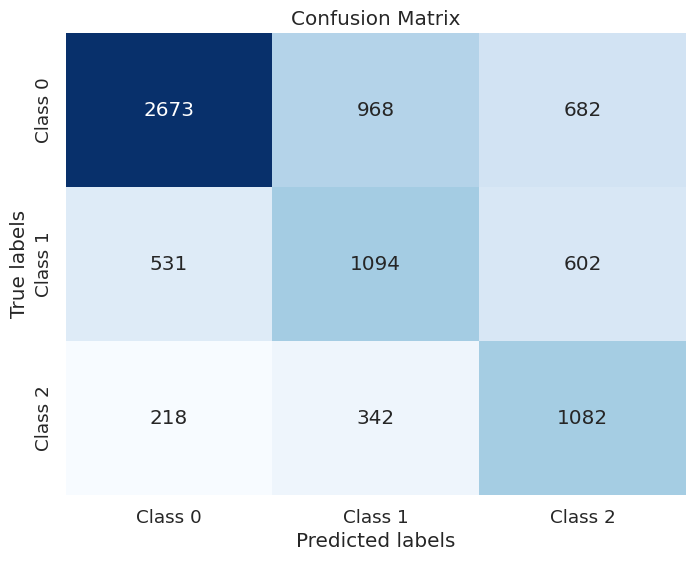

In [39]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

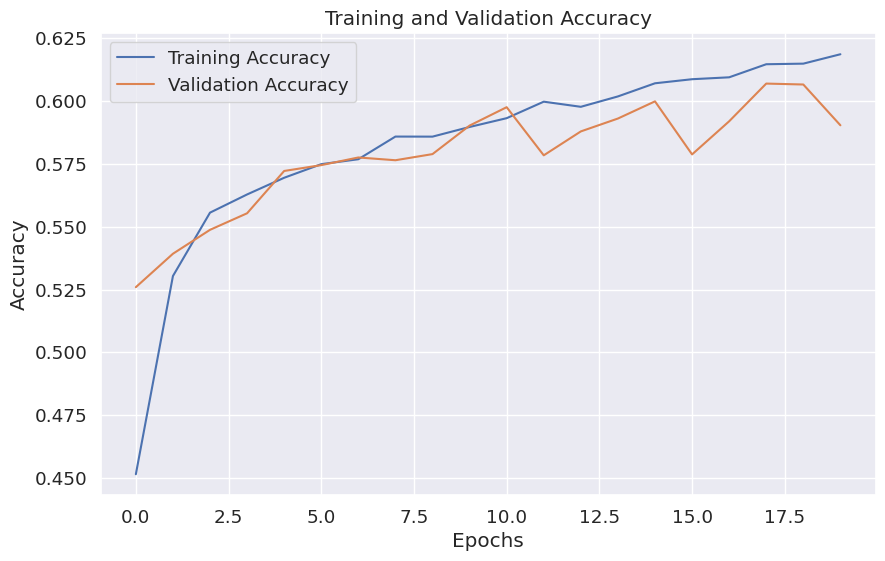

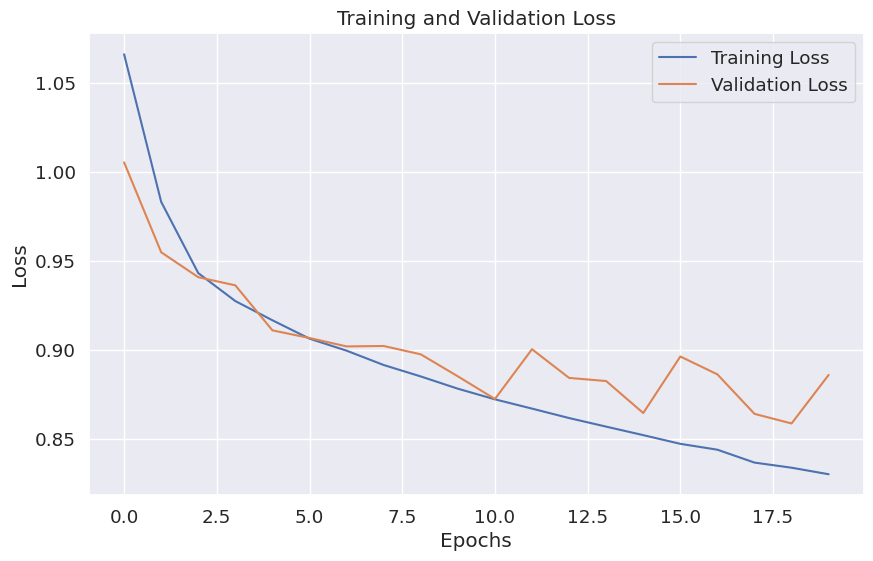

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()